# FIGURE 2. EMT AND SIGNALING OF AXL MUTANTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing
from msresist.figures.figure1 import plotClustergram, selectpeptides, FC_timecourse, barplot_UtErlAF154, barplotFC_TvsUT  
import warnings
warnings.simplefilter("ignore")

sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [2]:
pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## CELL MIGRATION

## Time Course

### Relative Wound Density (RWD)

Calculates the density of both the cell region and the wound region as defined by the initial scratch wound mask, and measures (%) of the density of the wound region (W) relative to the density of the cell region(c):


$$ RWD(t) = \frac{W(t)-W(0)}{C(t)-W(0)} $$

In [3]:
# rwdM = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_RWD_Matrigel_BR1.csv")
rwdC1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR1_RWD.csv")
rwdC2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR2_RWD.csv")
rwdC3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR3_RWD.csv")
rwdC4 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR4_RWD.csv")
lines = ["WT", "KO", "KI", "KD", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]

In [4]:
ds = [rwdC1, rwdC2, rwdC3, rwdC4]

t1 = ["UT", " E", " AF", "A/E"]
t2 = ["Untreated", "Erlotinib", "AF154", "Erl + AF154"]


In [5]:
# fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True, sharex=True)

# for i in range(len(t1)):
#     for x, d in enumerate(ds):
#         title = "Cell Migration - " + t2[i] + " - " + t3[x]
#         FC_timecourse(ax[x, i], d, itp, ftp, lines, t1[i], title, ylabel, FC=False)

# plt.tight_layout()

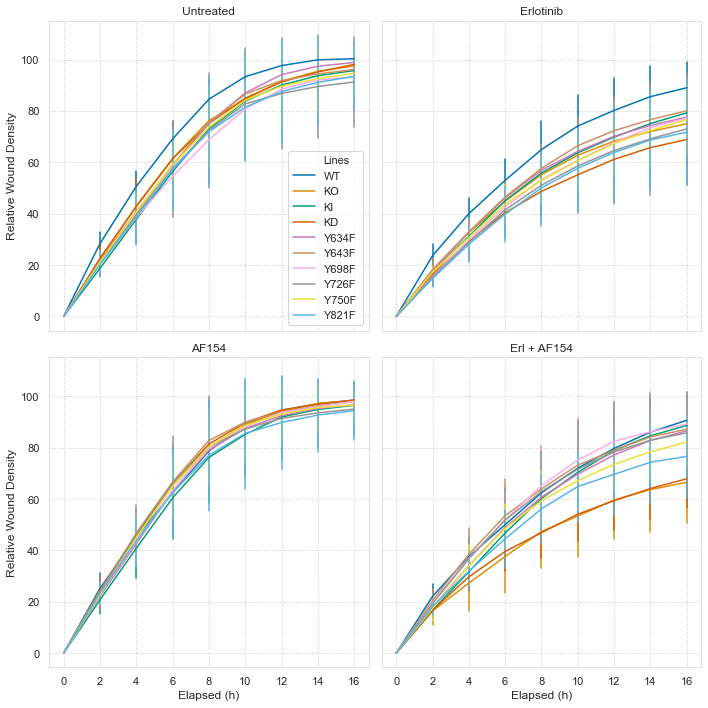

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True, sharex=True)
itp = 0
ftp = 16
ylabel = "Relative Wound Density"


for i in range(len(t1)):
    title = t2[i]
    if i < 2:
        FC_timecourse(ax[0, i], ds, itp, ftp, lines, t1[i], title, ylabel, FC=False)
    else:
        FC_timecourse(ax[1, i-2], ds, itp, ftp, lines, t1[i], title, ylabel, FC=False)

plt.tight_layout()

fig.savefig("TimeLapse_AXLmutants_CellMigration.png")

### Wound Confluence

In [25]:
wcC1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR1_WC.csv")
wcC2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR2_WC.csv")
wcC3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR3_WC.csv")
wcC4 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR4_WC.csv")


In [26]:
ds = [wcC1, wcC2, wcC3, wcC4]


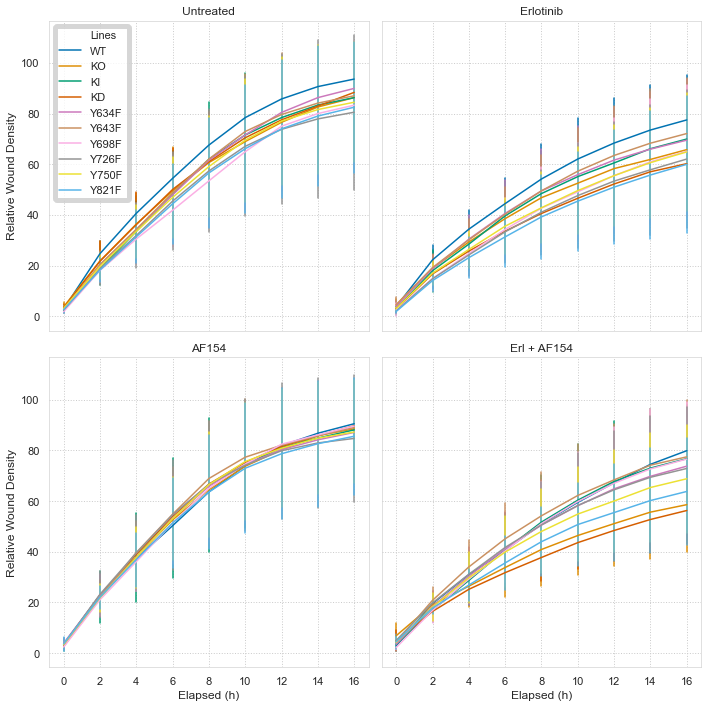

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True, sharex=True)
itp = 0
ftp = 16
ylabel = "Relative Wound Density"


for i in range(len(t1)):
    title = t2[i]
    if i < 2:
        FC_timecourse(ax[0, i], ds, itp, ftp, lines, t1[i], title, ylabel, FC=False)
    else:
        FC_timecourse(ax[1, i-2], ds, itp, ftp, lines, t1[i], title, ylabel, FC=False)

plt.tight_layout()


### Green RWD

In [7]:
rwdC1g = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR1_GreenRWD.csv")
rwdC2g = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR2_GreenRWD.csv")
rwdC3g = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR3_GreenRWD.csv")
rwdC4g = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR4_GreenRWD.csv")



In [33]:
glines = lines[2:]
dsold = [rwdC1g, rwdC2g, rwdC3g, rwdC4g]
dsrwdg = []
for d in dsold:
    if d.columns[1] == "PC9 UT":
        for col in range(8):
            d = d.drop(d.columns[1],axis = 1)
    dsrwdg.append(d)
for d in dsrwdg:
    d["Elapsed"] = dsrwdg[1]["Elapsed"]
ds = dsrwdg
ylabel = "Green RWD (" + str(ftp) + "h)"

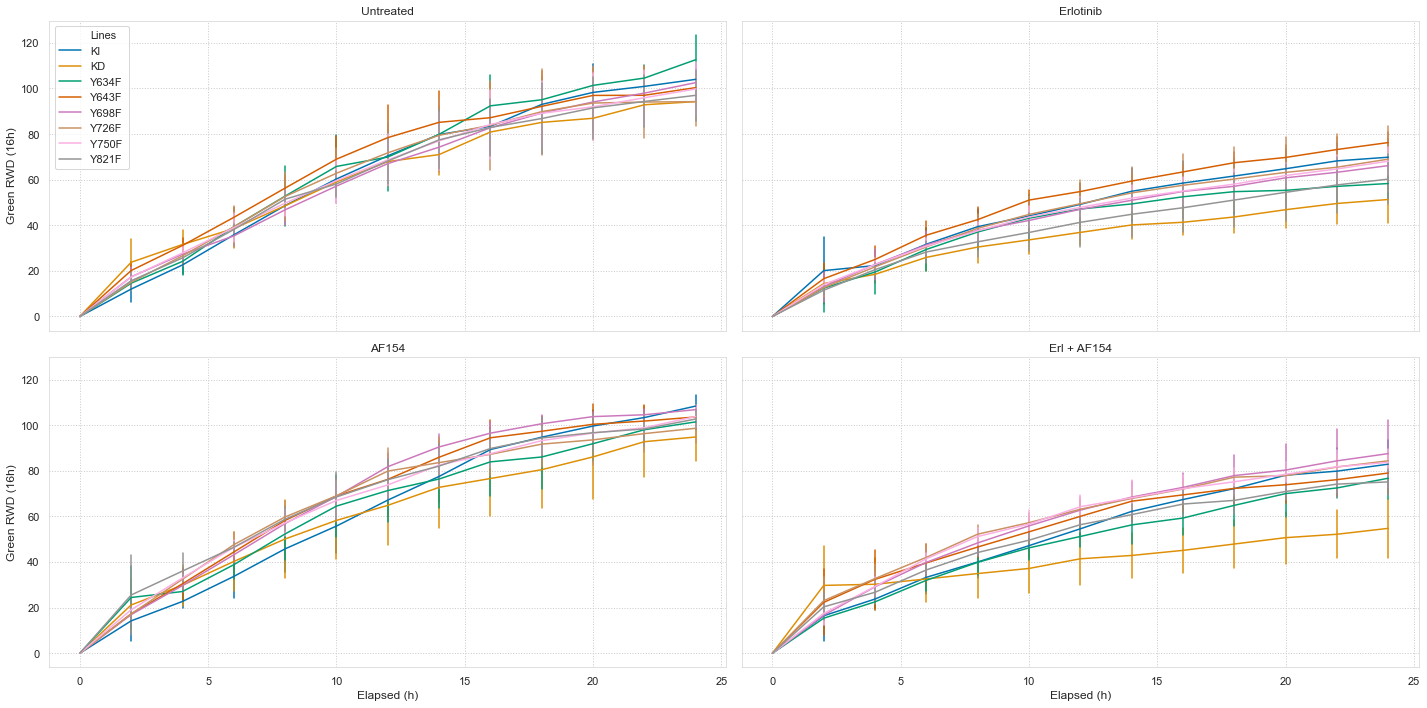

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True, sharex=True)
itp = 0
ftp = 24
for i in range(len(t1)):
    title = t2[i]
    if i < 2:
        FC_timecourse(ax[0, i], ds, itp, ftp, glines, t1[i], title, ylabel, FC=False)
    else:
        FC_timecourse(ax[1, i-2], ds, itp, ftp, glines, t1[i], title, ylabel, FC=False)

plt.tight_layout()

### Wound Width

In [10]:
wwC1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR1_WW.csv")
wwC2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR2_WW.csv")
wwC3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR3_WW.csv")
wwC4 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR4_WW.csv")



In [11]:
ds = [wwC1, wwC2, wwC3, wwC4]

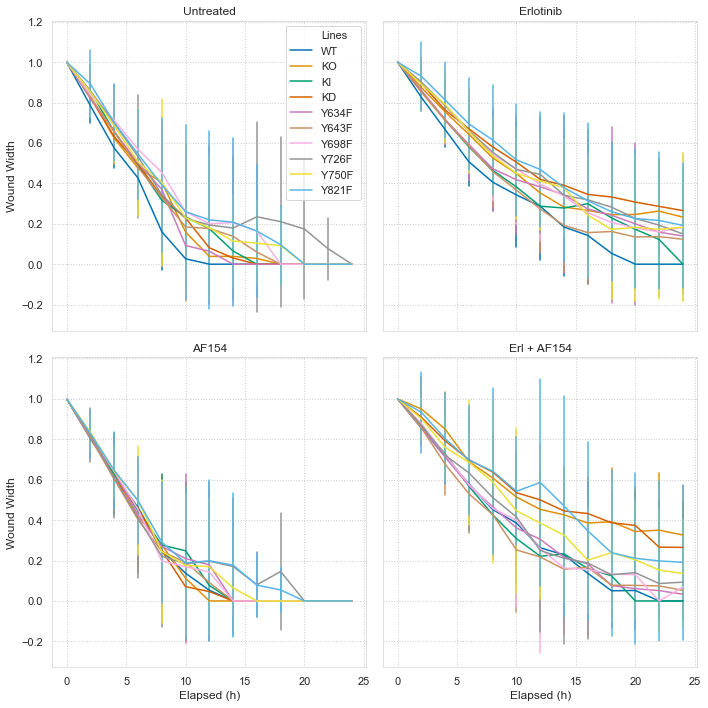

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True, sharex=True)
itp = 0
ftp = 24
ylabel = "Wound Width"


for i in range(len(t1)):
    title = t2[i]
    if i < 2:
        FC_timecourse(ax[0, i], ds, itp, ftp, lines, t1[i], title, ylabel, FC=True)
    else:
        FC_timecourse(ax[1, i-2], ds, itp, ftp, lines, t1[i], title, ylabel, FC=True)

plt.tight_layout()


### Green Wound Confluency

In [13]:
wcC1g = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR1_GreenWC.csv")
wcC2g = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR2_GreenWC.csv")
wcC3g = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR3_GreenWC.csv")
wcC4g = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/BR4_GreenWC.csv")


In [14]:
dsold = [wcC1g, wcC2g, wcC3g, wcC4g]
dswcg = []
for d in dsold:
    if d.columns[1] == "PC9 UT":
        for col in range(8):
            d = d.drop(d.columns[1],axis = 1)
    dswcg.append(d)
for d in dswcg:
    d["Elapsed"] = dswcg[1]["Elapsed"]
ds = dswcg
ylabel = "Green Wound Confluence"

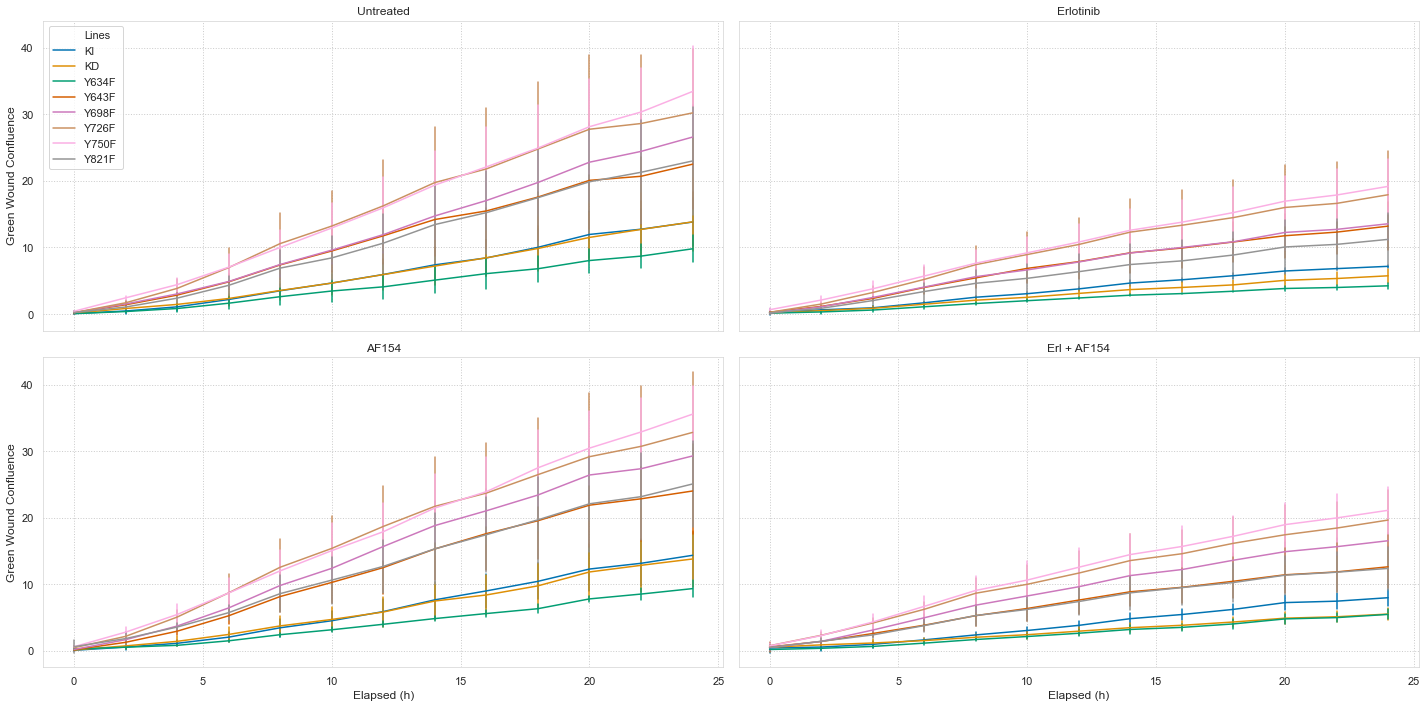

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True, sharex=True)
itp = 0
ftp = 24
for i in range(len(t1)):
    title = t2[i]
    if i < 2:
        FC_timecourse(ax[0, i], ds, itp, ftp, glines, t1[i], title, ylabel, FC=False)
    else:
        FC_timecourse(ax[1, i-2], ds, itp, ftp, glines, t1[i], title, ylabel, FC=False)

plt.tight_layout()

## At specified Endpoint

### RWD

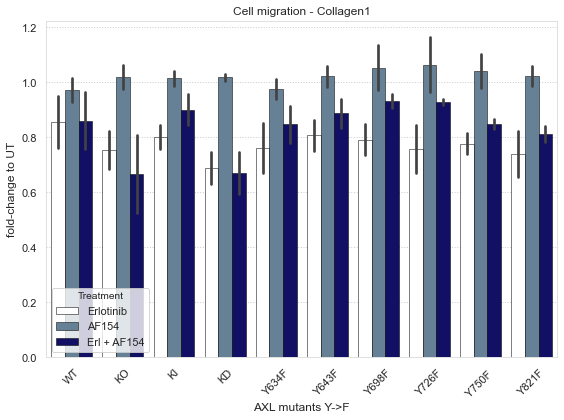

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

ftp = 14
itp = 0

rwdC = [rwdC1, rwdC2, rwdC3, rwdC4]



ylabel = "% Relative Wound Density"
c = ["white", "greyish blue", "deep blue"]

# barplotFC_TvsUT(ax[0], rwdM, itp, ftp, lines, tr1, tr2, "Cell migration - Matrigel", FC=False, colors=c)
barplotFC_TvsUT(ax, rwdC, itp, ftp, lines, t1, t2, "Cell migration - Collagen1", FC=False, colors=c)

plt.tight_layout()

### Wound Confluence

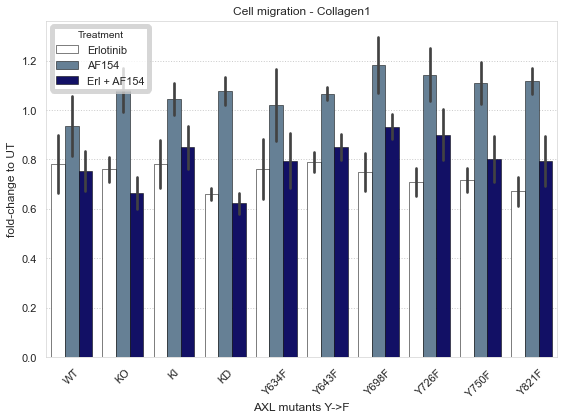

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

ftp = 10
itp = 0

ds = [wcC1, wcC2, wcC3, wcC4]



ylabel = "% Relative Wound Density"
c = ["white", "greyish blue", "deep blue"]

# barplotFC_TvsUT(ax[0], rwdM, itp, ftp, lines, tr1, tr2, "Cell migration - Matrigel", FC=False, colors=c)
barplotFC_TvsUT(ax, ds, itp, ftp, lines, t1, t2, "Cell migration - Collagen1", FC=False, colors=c)

plt.tight_layout()

### Green RWD

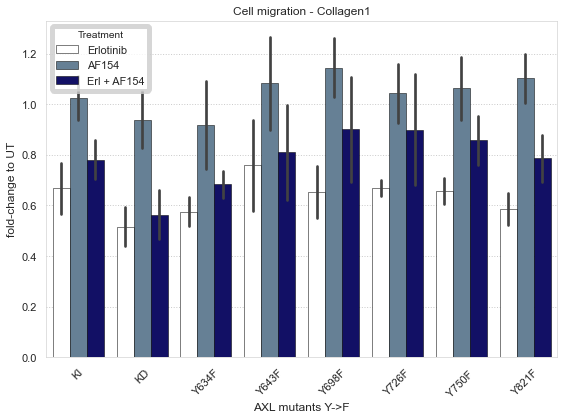

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

ftp = 18
itp = 0

ds = dsrwdg

ylabel = "% Relative Wound Density"
c = ["white", "greyish blue", "deep blue"]

# barplotFC_TvsUT(ax[0], rwdM, itp, ftp, lines, tr1, tr2, "Cell migration - Matrigel", FC=False, colors=c)
barplotFC_TvsUT(ax, ds, itp, ftp, glines, t1, t2, "Cell migration - Collagen1", FC=False, colors=c)

plt.tight_layout()

### Wound Width

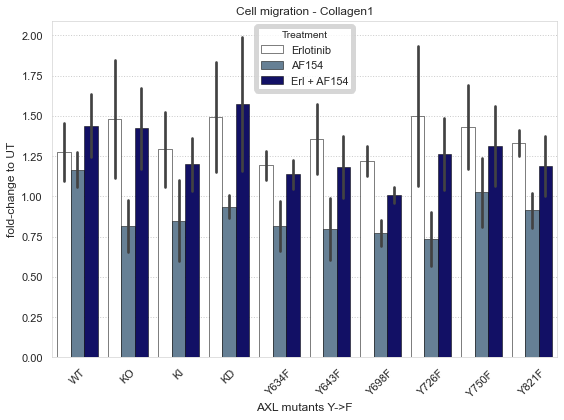

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

ftp = 6
itp = 0

ds = [wwC1, wwC2, wwC3, wwC4]

for d in ds:
    d["Elapsed"] = ds[1]["Elapsed"]

ylabel = "% Relative Wound Density"
c = ["white", "greyish blue", "deep blue"]

# barplotFC_TvsUT(ax[0], rwdM, itp, ftp, lines, tr1, tr2, "Cell migration - Matrigel", FC=False, colors=c)
barplotFC_TvsUT(ax, ds, itp, ftp, lines, t1, t2, "Cell migration - Collagen1", FC=False, colors=c)

plt.tight_layout()

### Green Wound Confluence

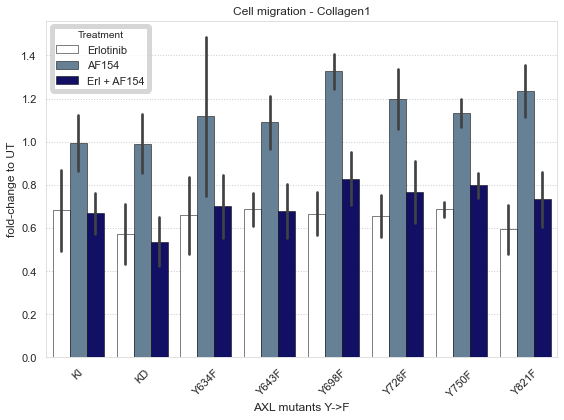

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

ftp = 12
itp = 0

ds = dswcg

ylabel = "% Relative Wound Density"
c = ["white", "greyish blue", "deep blue"]

# barplotFC_TvsUT(ax[0], rwdM, itp, ftp, lines, tr1, tr2, "Cell migration - Matrigel", FC=False, colors=c)
barplotFC_TvsUT(ax, ds, itp, ftp, glines, t1, t2, "Cell migration - Collagen1", FC=False, colors=c)

plt.tight_layout()

In [19]:
raise SystemExit

SystemExit: 

### Green RWD

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True)

ftp = 24
itp = 0

tr1 = ['UT', 'AF', ' E', 'A/E']
tr2 = ['UT', 'AF154', 'Erlotinib', 'Erl + AF154']

ylabel = "% Relative Wound Density"
c = ["white", "greeny grey", "forest green"]

barplotFC_TvsUT(ax[0], rwdMg, itp, ftp, glines, tr1, tr2, "Cell migration - Matrigel", FC=False, colors=c)
barplotFC_TvsUT(ax[1], rwdCg, itp, ftp, glines, tr1, tr2, "Cell migration - Collagen1", FC=False, colors=c)

plt.tight_layout()

### Wound Width

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True)

ftp = 24
itp = 0

tr1 = ['UT', 'AF', ' E', 'A/E']
tr2 = ['Untreeated', 'AF154', 'Erlotinib', 'Erl + AF154']

ylabel = "Wound Width"

c = ["white", "light grey", "slate grey", "green brown"]

barplot_UtErlAF154(ax[0], lines, wwM, itp, ftp, tr1, tr2, ylabel, "Cell migration - Matrigel", FC=False, colors=c)
barplot_UtErlAF154(ax[1], lines, wwC, itp, ftp, tr1, tr2, ylabel, "Cell migration - Collagen1", FC=False, colors=c)

plt.tight_layout()

### Wound Confluency

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True)

ftp = 24
itp = 0

tr1 = ['UT', 'AF', ' E', 'A/E']
tr2 = ['Untreeated', 'AF154', 'Erlotinib', 'Erl + AF154']

ylabel = "% Wound Confluency"

c = ["white", "light grey", "slate grey", "green brown"]

barplot_UtErlAF154(ax[0], lines, wcM, itp, ftp, tr1, tr2, ylabel, "Cell migration - Matrigel", FC=False, colors=c)
barplot_UtErlAF154(ax[1], lines, wcC, itp, ftp, tr1, tr2, ylabel, "Cell migration - Collagen1", FC=False, colors=c)

plt.tight_layout()

## SIGNALING

## Selecting and Clustering a subset of kinases of interest

In [ ]:
A = preprocessing(Axlmuts_ErlF154=True, motifs=True, log2T=True, mc_row=True)
A.columns = list(A.columns[:5]) + ["WT", "Knock-Out", "Kinase Dead", "Knock-In", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F", "Y821F"]

B = preprocessing(Axlmuts_Erl=True, motifs=True, log2T=True, mc_row=True)
B.columns = A.columns

In [ ]:
koi = {"AXL":["Y702-p", "Y759-p", "Y866-p"], "EGFR":"Y1197-p", "MET":"Y1003-p", "ERBB2":"Y877-p", "ERBB3":"Y1328-p", "EPHB3":"Y792-p", "GAB1":"Y627-p", "GAB2":"T265-p", "CRK":"Y251-p", 
    "CRKL":"Y251-p", "SHC1":"S426-p", "MAPK1":"Y187-p;T185-p", "MAPK7":"Y221-p", "MAPK12":"Y185-p", "MAPK13":"Y182-p", "MAPK14":"Y182-p", "BCAR1":["Y128-p", "Y410-p"], "BCAR3":"Y212-p", "NME2":"Y52-p",
    "DOCK1":"Y1811-p", "ELMO2":"Y48-p", "PTPN11":["Y542-p", "Y584-p"], "NEDD9":["189-p", "S182-p"], "TNS1":"Y1326-p", "TNS2":"Y483-p", "TNS3":["Y802-p", "Y855-p"], "CTTN":["Y421-p", "Y421-p;S418-p"], 
    "ANKS1A":"Y455-p", "FLNB":"Y2505-p", "PRKCD":"Y313-p", "ADAM9":["S816-p", "T777-p"], "BRK1":"Y63-p", "ARAP1":"Y231-p", "CTNND1":"Y228-p", "TNK2":"Y284-p", "RIN1":"Y681-p", "MCAM":"Y641-p", "SRCIN1":"Y396-p",
    "ITGB1":"T789-p", "ITGB4":"Y1207-p"
}

In [ ]:
A = A.copy().set_index(["Abbv", "Position"])
B = B.copy().set_index(["Abbv", "Position"])

In [ ]:
Ams = selectpeptides(A.drop("WT", axis=1), koi)
Aredd = Ams.set_index(["Abbv", "Position"]).iloc[:, 3:].astype("float")

Bms = selectpeptides(B, koi)
Bredd = Bms.set_index(["Abbv", "Position"]).iloc[:, 3:].astype("float")

In [ ]:
plotClustergram(Aredd.T, "Reduced MS AXL mutants +Erl +F154", max(np.max(np.abs(Aredd)) * 0.3), figsize=(15, 7))

In [ ]:
plotClustergram(Bredd.T, "Reduced MS AXL mutants +Erlotinib", max(np.max(np.abs(Bredd)) * 0.3), figsize=(15, 7))